# Network Intrusion Detection System

### Multinomial Classification (normal or DOS or PROBE or R2L or U2R)

## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [4]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [5]:
train=pd.read_csv('NSL_Dataset\Train.txt',sep=',')
test=pd.read_csv('NSL_Dataset\Test.txt',sep=',')

In [6]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations", 
         "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate",
         "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
         "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
         "dst_host_srv_rerror_rate","attack","last_flag"] 

In [8]:
len(columns)

43

In [9]:
train.columns=columns
test.columns=columns

In [10]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [11]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [15]:
train['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [16]:
test['attack'].value_counts()

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

In [17]:
train.shape

(125972, 43)

In [18]:
test.shape

(22543, 43)

# Binomial Classification

### In attack_class normal means 0 and attack means 1.

In [19]:
train['attack_class'] = np.where(train.attack== 'normal', 0, 1)

In [20]:
train.attack_class.value_counts()

0    67342
1    58630
Name: attack_class, dtype: int64

In [21]:
test['attack_class']=np.where(test.attack=='normal',0,1)

In [22]:
test.attack_class.value_counts()

1    12832
0     9711
Name: attack_class, dtype: int64

In [23]:
train.shape

(125972, 44)

In [24]:
test.shape

(22543, 44)

# Multinominial Classification

In [25]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [26]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

In [27]:
train.attack_class.value_counts()

0    67342
1    45927
2    11656
3      995
4       52
Name: attack_class, dtype: int64

In [28]:
test.attack_class.value_counts()

0    9711
1    7459
3    2885
2    2421
4      67
Name: attack_class, dtype: int64

In [29]:
#output=pandas_profiling.ProfileReport(train)
#output

### Exporting pandas profiling output to html file

In [30]:
#output.to_file('pandas_profiling.html')

### Basic Exploratory Analysis

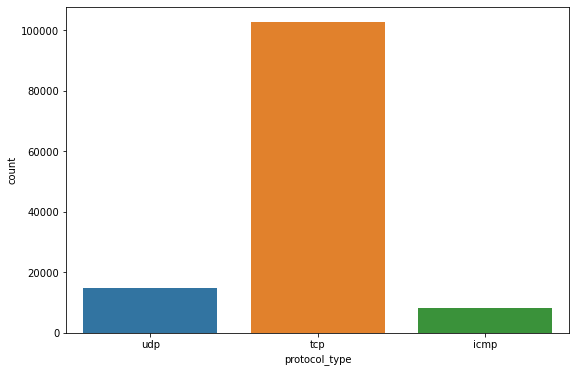

In [31]:
# Protocol type distribution
plt.figure(figsize=(9,6))
sns.countplot(x="protocol_type", data=train)
plt.show()

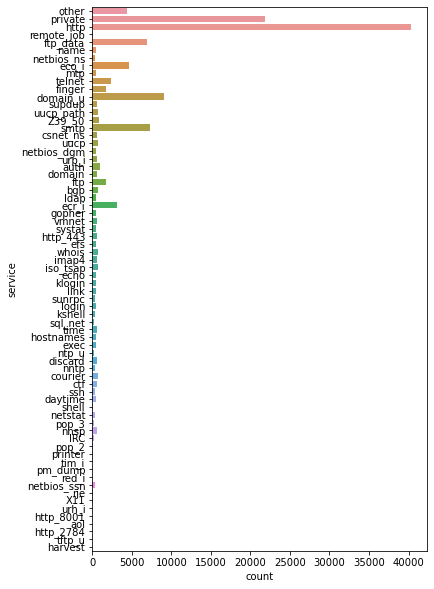

In [32]:
# service distribution
plt.figure(figsize=(6,10))
sns.countplot(y="service", data=train)
plt.show()

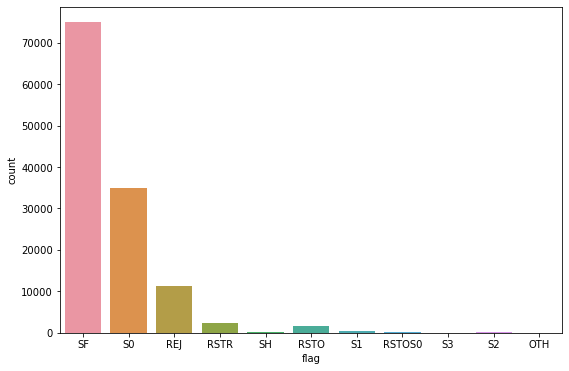

In [33]:
# flag distribution
plt.figure(figsize=(9,6))
sns.countplot(x="flag", data=train)
plt.show()

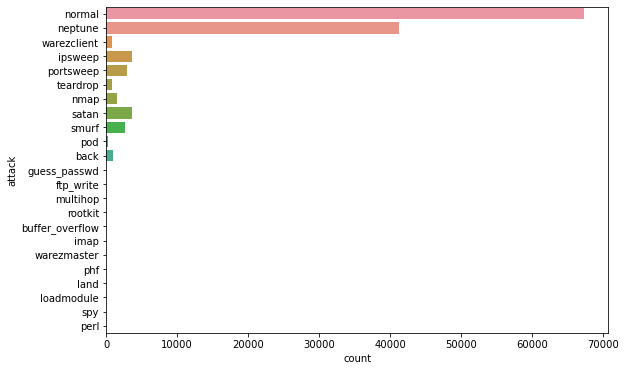

In [34]:
# attack distribution
plt.figure(figsize=(9,6))
sns.countplot(y="attack", data=train)
plt.show()

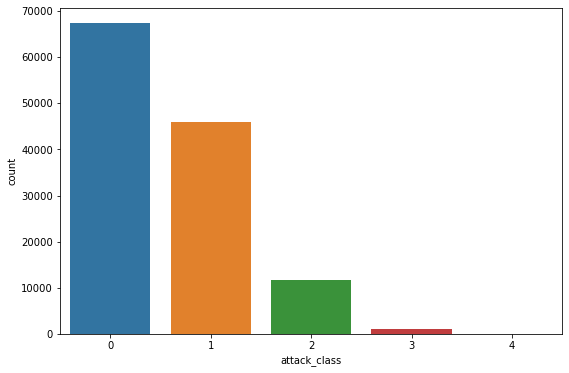

In [35]:
# attack class distribution
plt.figure(figsize=(9,6))
sns.countplot(x="attack_class", data=train)
plt.show()

C:\Users\Vicky\anaconda31\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Vicky\anaconda31\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


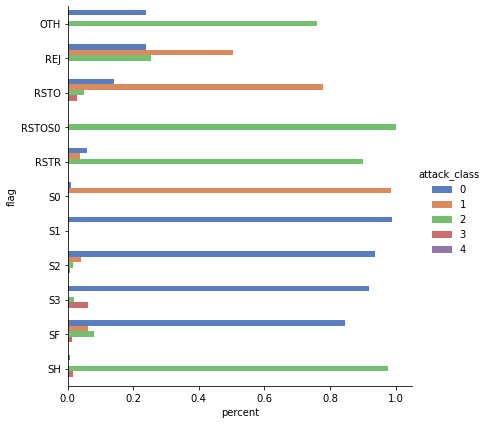

In [36]:
flag_count = train[['flag', 'attack_class']].groupby(['flag', 'attack_class']).size()
flag_count_percent = flag_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
flag_count_percent.columns = ['flag', 'attack_class', 'percent']
sns.factorplot(y="flag",
            x = 'percent',
            hue="attack_class",
            data = flag_count_percent,
            size=6,
            kind="bar",
            palette="muted")

C:\Users\Vicky\anaconda31\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Vicky\anaconda31\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


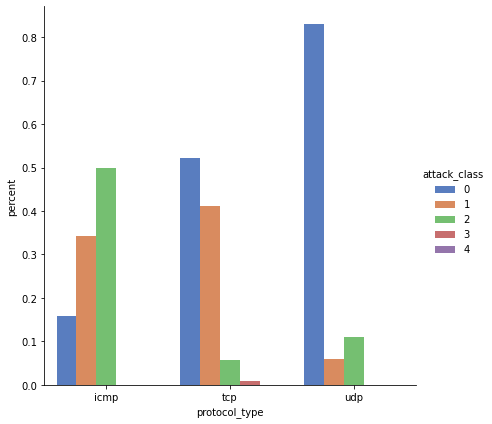

In [37]:
type_count = train[['protocol_type', 'attack_class']].groupby(['protocol_type', 'attack_class']).size()
type_count_percent = type_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
type_count_percent.columns = ['protocol_type', 'attack_class', 'percent']
sns.factorplot(x="protocol_type",
            y = 'percent',
            hue="attack_class",
            data = type_count_percent,
            size=6,
            kind="bar",
            palette="muted")

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [38]:
train.groupby('attack_class').mean().T

attack_class,0,1,2,3,4
duration,168.589899,0.006227,2074.858185,633.417085,80.942308
src_bytes,13133.467064,1176.321162,385679.838367,307727.300503,906.230769
dst_bytes,4329.749517,169.201537,181074.911805,81822.026131,5141.961538
land,0.000104,0.000392,0.000000,0.000000,0.000000
wrong_fragment,0.000000,0.062229,0.000000,0.000000,0.000000
urgent,0.000148,0.000000,0.000000,0.003015,0.019231
hot,0.230658,0.039889,0.001630,8.334673,1.403846
num_failed_logins,0.001381,0.000000,0.000343,0.056281,0.019231
logged_in,0.710656,0.020837,0.007121,0.913568,0.884615
num_compromised,0.507083,0.019226,0.000601,0.077387,1.211538


##### Observations:
- The length of time duration of connection for attack is higher than  normal.
- Wrong fragments in the connection is only present in attack.
- Number of outbound commands in an ftp session  are 0 in both normal and attack.

# Seperate numerical and categorical variables

In [39]:
#numeric_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
#cat_var_names=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object', 'O']]
tr_num_var=train.select_dtypes(['int64','float64','int32','float32'])
ts_num_var=test.select_dtypes(['int64','float64','int32','float32'])

In [40]:
tr_cat_var = train.select_dtypes('object')
ts_cat_var = test.select_dtypes('object')

In [41]:
tr_num_var.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1


In [42]:
tr_num_var.shape


(125972, 40)

In [43]:
tr_cat_var.shape

(125972, 4)

In [44]:
tr_cat_var.head()

,protocol_type,service,flag,attack
0,udp,other,SF,normal
1,tcp,private,S0,neptune
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,neptune


In [45]:
ts_num_var.shape

(22543, 40)

In [46]:
ts_cat_var.shape

(22543, 4)

### Data Audit Report

In [47]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [48]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [49]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [246]:
 tr_num_var_summ = tr_num_var.apply(continuous_var_summary).T.round(2)


In [247]:
ts_num_var_summ =ts_num_var.apply(continuous_var_summary).T.round(2)

In [248]:
tr_num_var_summ.to_csv('num_summary_train.csv')
ts_num_var_summ.to_csv('num_summary_test.csv')

In [251]:
# alternate of .describe() for categorical variables
# alternate of .describe() for categorical variables
tr_cat_var_summ = tr_cat_var.apply(categorical_var_summary).T


In [252]:
ts_cat_var_summ = ts_cat_var.apply(categorical_var_summary).T

In [253]:
tr_cat_var_summ.to_csv("tr_cat_var_summ.csv")
ts_cat_var_summ.to_csv("ts_cat_var_summ.csv")

### Handling Outlier

In [55]:
tr_num_var = tr_num_var.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
ts_num_var = ts_num_var.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [56]:
tr_num_var.apply(continuous_var_summary).T.round(2)
ts_num_var.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22543.0,0.0,4.537646e+06,201.29,0.00,1105.84,1.222886e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.34,7589.58
src_bytes,22543.0,0.0,1.246517e+08,5529.51,54.00,30891.71,9.542980e+08,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.00,283618.00
dst_bytes,22543.0,0.0,3.217638e+07,1427.33,46.00,3874.02,1.500806e+07,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.40,8314.00,26015.22,26032.76
land,22543.0,0.0,0.000000e+00,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,22543.0,0.0,0.000000e+00,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
urgent,22543.0,0.0,0.000000e+00,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hot,22543.0,0.0,1.924000e+03,0.09,0.00,0.40,1.600000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00
num_failed_logins,22543.0,0.0,4.780000e+02,0.02,0.00,0.14,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
logged_in,22543.0,0.0,9.969000e+03,0.44,0.00,0.50,2.500000e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
num_compromised,22543.0,0.0,3.690000e+02,0.02,0.00,0.13,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00


#### No missing in train dataset . So , Missing treatment not required .

### Dummy Variable Creation

In [57]:
# get the useful categorical variables
tr_cat_var = train[['protocol_type', 'service','flag','attack']]

# for c_feature in categorical_features
for c_feature in ['protocol_type', 'service','flag','attack']:
    tr_cat_var[c_feature] = tr_cat_var[c_feature].astype('category')
    tr_cat_var = create_dummies(tr_cat_var, c_feature)

C:\Users\Vicky\AppData\Local\Temp/ipykernel_17860/2511646847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_cat_var[c_feature] = tr_cat_var[c_feature].astype('category')


In [58]:
# get the useful categorical variables
ts_cat_var = test[['protocol_type', 'service','flag','attack']]

# for c_feature in categorical_features
for c_feature in ['protocol_type', 'service','flag','attack']:
    ts_cat_var[c_feature] = ts_cat_var[c_feature].astype('category')
    ts_cat_var = create_dummies(ts_cat_var, c_feature)

C:\Users\Vicky\AppData\Local\Temp/ipykernel_17860/2904532166.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_cat_var[c_feature] = ts_cat_var[c_feature].astype('category')


### Final file for analysis

In [59]:
ts_cat_var

,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,attack_snmpgetattack,attack_snmpguess,attack_sqlattack,attack_teardrop,attack_udpstorm,attack_warezmaster,attack_worm,attack_xlock,attack_xsnoop,attack_xterm
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22539,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22540,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22541,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
train_new= pd.concat([tr_num_var, tr_cat_var], axis = 1)
test_new = pd.concat([ts_num_var, ts_cat_var], axis = 1)

In [61]:
train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,232.0,8153.0,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,199.0,420.0,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
test_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_snmpgetattack,attack_snmpguess,attack_sqlattack,attack_teardrop,attack_udpstorm,attack_warezmaster,attack_worm,attack_xlock,attack_xsnoop,attack_xterm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,12983.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,267.0,14515.0,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
train_new.shape

(125972, 143)

In [64]:
test_new.shape

(22543, 152)

In [255]:
# correlation matrix (ranges from 1 to -1)
corrm=train_new.corr()
corrm

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,count,srv_count,serror_rate,rerror_rate,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.011740,0.036892,0.021274,-0.064538,0.062081,-0.099244,-0.050309,-0.087514,0.173108,...,-0.000757,-0.005534,0.408874,-0.000414,-0.023837,-0.020279,0.000605,-0.011691,0.037013,-0.001571
src_bytes,0.011740,1.000000,0.127827,0.379973,0.163275,0.603363,-0.105271,-0.036083,-0.100189,-0.044664,...,-0.000898,0.002845,-0.022114,-0.001067,-0.028784,-0.002928,-0.000555,-0.013779,0.047995,-0.002012
dst_bytes,0.036892,0.127827,1.000000,0.127002,0.421999,0.237363,-0.237214,-0.087531,-0.201776,-0.118673,...,0.010050,-0.014104,-0.053377,0.006873,-0.060374,-0.051676,-0.000156,-0.029791,-0.011541,0.064962
hot,0.021274,0.379973,0.127002,1.000000,0.168937,0.423630,-0.100540,-0.049883,-0.082286,-0.035476,...,0.031240,-0.005627,-0.020526,0.003811,-0.022771,-0.020616,-0.000561,-0.011886,0.270177,0.003599
logged_in,-0.064538,0.163275,0.421999,0.168937,1.000000,0.125493,-0.539762,-0.201053,-0.491931,-0.287518,...,0.006963,-0.032352,-0.124581,0.001900,-0.134123,-0.118539,0.000850,-0.068341,0.104233,-0.007621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attack_smurf,-0.020279,-0.002928,-0.051676,-0.020616,-0.118539,-0.014876,0.374258,0.698080,-0.093337,-0.054835,...,-0.000825,-0.005856,-0.022607,-0.001305,-0.025242,1.000000,-0.000584,-0.012370,-0.012356,-0.001846
attack_spy,0.000605,-0.000555,-0.000156,-0.000561,0.000850,-0.000405,-0.002892,-0.001481,-0.002539,-0.001492,...,-0.000022,-0.000159,-0.000615,-0.000036,-0.000687,-0.000584,1.000000,-0.000336,-0.000336,-0.000050
attack_teardrop,-0.011691,-0.013779,-0.029791,-0.011886,-0.068341,-0.008576,-0.016979,0.026996,-0.039858,-0.031162,...,-0.000476,-0.003376,-0.013034,-0.000752,-0.014553,-0.012370,-0.000336,1.000000,-0.007123,-0.001064
attack_warezclient,0.037013,0.047995,-0.011541,0.270177,0.104233,-0.008567,-0.061012,-0.030985,-0.053220,-0.030839,...,-0.000475,-0.003372,-0.013019,-0.000752,-0.014536,-0.012356,-0.000336,-0.007123,1.000000,-0.001063


In [256]:
corrm.to_csv('corrm.csv')

<AxesSubplot:>

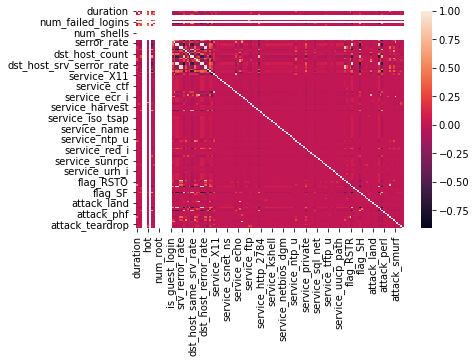

In [67]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corrm)

#### Dropping columns based on data audit report
        - Based on low variance (near zero variance)
        - High missings (>25% missings)
        - High correlations between two numerical variables

In [68]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'], axis=1, inplace=True)

<AxesSubplot:>

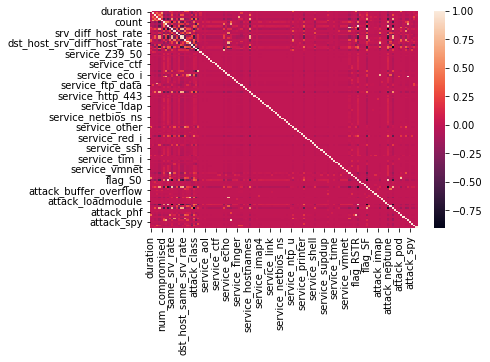

In [69]:
sns.heatmap(train_new.corr())

#### Variable reduction using Select K-Best technique

In [70]:
train_new.head()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,count,srv_count,serror_rate,rerror_rate,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0.0,146.0,0.0,0.0,0,0.0,13.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0,0.0,123.0,6.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,232.0,8153.0,0.0,1,0.0,5.0,5.0,0.2,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,199.0,420.0,0.0,1,0.0,30.0,32.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0,0.0,121.0,19.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X = train_new[train_new.columns.difference(['attack_class'])]


In [72]:
X_new = SelectKBest(f_classif, k=15).fit(X, train_new['attack_class'] )

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [73]:
X_new.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [74]:
X_new.scores_

array([1.34064116e+02, 3.56884766e+01, 2.37277235e+02, 4.90832543e+01,
       2.23882592e+04, 1.56916475e+01, 4.01526990e+01, 3.12249574e+01,
       3.49978365e+05, 7.54266680e+03,            inf, 1.33779097e+01,
       1.78386176e+01, 1.75924658e+02, 1.69864681e+04, 4.46176249e+01,
       2.26844805e+04, 2.44673212e+03, 8.91790430e+00, 7.92699452e+02,
       4.26678275e+03, 8.93056079e+01, 4.22698233e+04, 7.97231867e+03,
       5.76300314e+03, 1.85803691e+04, 2.24895262e+04, 2.75241067e+04,
       6.70321129e+04, 6.92428333e+04, 1.83320102e+04, 2.42923569e+03,
       2.92634050e+03, 6.10523702e+02, 4.62953538e+02, 1.01592004e+04,
       1.10260381e+05, 1.52322078e+02, 4.14807873e+01, 1.57821049e+01,
       1.10776633e+05, 1.21395725e+03, 1.29054963e+02, 3.23685410e+04,
       5.75770350e+04, 2.97251093e+02, 5.23057641e+03, 3.77796192e+03,
       8.06829774e+03, 1.33879527e+05, 1.02833658e+05, 2.34824947e+01,
       7.35338278e+02, 8.91790430e+00, 2.91628764e+02, 5.98590866e+02,
      

In [75]:
# capturing the important variables
KBest_features=X.columns[X_new.get_support()]
KBest_features

Index(['attack_neptune', 'attack_normal', 'attack_satan', 'count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http'],
      dtype='object')

### Final list of variable selected for the model building using Select KBest

In [76]:
print(KBest_features)

Index(['attack_neptune', 'attack_normal', 'attack_satan', 'count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http'],
      dtype='object')


# All Columns

In [77]:
all_columns = "+".join(train_new.columns.difference( ['attack_class'] ))

print (all_columns)

attack_buffer_overflow+attack_ftp_write+attack_guess_passwd+attack_imap+attack_ipsweep+attack_land+attack_loadmodule+attack_multihop+attack_neptune+attack_nmap+attack_normal+attack_perl+attack_phf+attack_pod+attack_portsweep+attack_rootkit+attack_satan+attack_smurf+attack_spy+attack_teardrop+attack_warezclient+attack_warezmaster+count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+duration+flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+hot+last_flag+logged_in+num_compromised+protocol_type_tcp+protocol_type_udp+rerror_rate+same_srv_rate+serror_rate+service_X11+service_Z39_50+service_aol+service_auth+service_bgp+service_courier+service_csnet_ns+service_ctf+service_daytime+service_discard+service_domain+service_domain_u+service_echo+service_eco_i+service_ecr_i+service_efs+service_exec+service_finger+service_ftp+service_ftp_data+service_

In [78]:
train=train_new
test=test_new

In [79]:
# import the packages for vif
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from patsy import dmatrices
# run the dmatrices
#a, b = dmatrices(formula_like='''attack_class ~ count+diff_srv_rate+dst_bytes+dst_host_count+
#                 dst_host_diff_srv_rate+dst_host_same_src_port_rate+
#                 dst_host_srv_diff_host_rate+duration+
#                 hot+last_flag+logged_in+num_compromised+
#                srv_count+srv_diff_host_rate''', data =train_new, return_type = 'dataframe')

# get the VIF
#vif = pd.DataFrame()
#vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
#vif["features"] = b.columns

#vif

## Model Building

### Finalise the train and test datasets for model building 

In [80]:
top_features=['attack_neptune','attack_normal','attack_satan','count','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_same_srv_rate','dst_host_srv_count','flag_S0','flag_SF','last_flag','logged_in','same_srv_rate','serror_rate','service_http']
X_train = train[top_features]
y_train = train['attack_class']
X_test = test[top_features]
y_test = test['attack_class']

### Building logistic Regression

#### 1) LogisticRegression

In [81]:
# Building Models
from sklearn.linear_model import LogisticRegression

In [82]:
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lr_clf.fit(X_train, y_train)

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

In [83]:
y_pred=lr_clf.predict(X_test)  # Prediction on Xtrain data 
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [84]:
list( zip( top_features, lr_clf.coef_[0] ) )

[('attack_neptune', -2.2134185067217276),
 ('attack_normal', 9.148227101310443),
 ('attack_satan', -0.7375420883978673),
 ('count', -0.0023469945916156807),
 ('dst_host_diff_srv_rate', 0.04060581931828634),
 ('dst_host_same_src_port_rate', -1.800155142441716),
 ('dst_host_same_srv_rate', -1.039168481863386),
 ('dst_host_srv_count', 0.0035638591294112486),
 ('flag_S0', -1.381863460045954),
 ('flag_SF', -0.042670176823752605),
 ('last_flag', 0.05942107697297808),
 ('logged_in', 0.32412038402496623),
 ('same_srv_rate', -0.5691912805314749),
 ('serror_rate', -1.4869142978394756),
 ('service_http', 0.12599953167355837)]

In [85]:
lr_clf.intercept_

array([-2.07572165,  0.81995272,  1.25576893])

In [86]:
lr_clf.score(X_train,y_train)

0.9920617280030483

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8377323337621435

#### 2) RidgeClassifier

In [88]:
from sklearn.linear_model import RidgeClassifier

In [89]:
rc_clf = RidgeClassifier().fit(X_train, y_train)

In [90]:
y_pred=rc_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 2., 0., 2.])

In [91]:
lr_clf.score(X_train,y_train)

0.9920617280030483

In [92]:
lr_clf.score(X_train,y_train)

0.9920617280030483

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7605021514439072

### K-Nearest Neighbors

#### 1) KNeighborsClassifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
k_neigh = KNeighborsClassifier(n_neighbors=3)
k_neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
y_pred=k_neigh.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 0.])

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7538482012154549

#### 3) NearestCentroid

In [98]:
#from sklearn.neighbors.nearest_centroid import NearestCentroid

In [99]:
#nc = NearestCentroid()
#nc.fit(X_train, y_train)

In [100]:
#y_pred=nc.predict(X_test)
#y_pred

In [101]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, y_pred)

### Discriminant Analysis

#### 1) LinearDiscriminantAnalysis

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) 

LinearDiscriminantAnalysis()

In [104]:
y_pred=lda.predict(X_test)
y_pred

array([1., 0., 2., ..., 0., 0., 2.])

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7071374706117198

#### 2) QuadraticDiscriminantAnalysis

In [106]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [107]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [108]:
y_pred=qda.predict(X_test)
y_pred

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\discriminant_analysis.py:836: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([0., 0., 0., ..., 0., 0., 0.])

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4307767377900013

### Decision Trees

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import sklearn.tree as dt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV

In [111]:
clf_tree = DecisionTreeClassifier( max_depth = 5)
clf_tree=clf_tree.fit( X_train, y_train )

In [112]:
y_pred=qda.predict(X_test)
y_pred

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\discriminant_analysis.py:836: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([0., 0., 0., ..., 0., 0., 0.])

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4307767377900013

#### Fine Tuning the parameters

In [114]:
X_train.shape

(125972, 15)

In [115]:
y_train.shape

(125972,)

In [116]:
X_test.shape

(22543, 15)

In [117]:
y_test.shape

(22543,)

In [118]:
param_grid = {'max_depth': np.arange(3, 12),
             'max_features': np.arange(3,15)}

In [119]:
#from sklearn.model_selection import GridSearchCV

In [120]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, verbose=1,n_jobs=-1)
tree.fit( X_train, y_train )

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=1)

In [121]:
tree.best_score_

0.9992538016128009

In [122]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=11, max_features=9)

In [123]:
tree.best_params_

{'max_depth': 11, 'max_features': 9}

In [124]:
train_pred = tree.predict(X_train)

In [125]:
print(metrics.classification_report(y_train, train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67342
         1.0       1.00      1.00      1.00     45927
         2.0       1.00      1.00      1.00     12703

    accuracy                           1.00    125972
   macro avg       1.00      1.00      1.00    125972
weighted avg       1.00      1.00      1.00    125972



In [126]:
test_pred = tree.predict(X_test)

In [127]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9711
         1.0       0.90      0.89      0.89      7459
         2.0       0.41      0.93      0.57      2421
         3.0       0.00      0.00      0.00      2952

    accuracy                           0.82     22543
   macro avg       0.58      0.70      0.62     22543
weighted avg       0.77      0.82      0.79     22543



C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Building Final Decision Tree Model

In [128]:
clf_tree = DecisionTreeClassifier( max_depth = 11, max_features=12 )
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=11, max_features=12)

#### Feature Relative Importance

In [129]:
X_train.columns

Index(['attack_neptune', 'attack_normal', 'attack_satan', 'count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_same_srv_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'serror_rate',
       'service_http'],
      dtype='object')

In [130]:
clf_tree.feature_importances_

array([1.81250896e-01, 7.24181199e-01, 1.71766660e-02, 4.39630189e-02,
       4.25405096e-03, 3.02266698e-03, 4.46328464e-04, 1.99425923e-02,
       3.66896720e-04, 7.51391260e-04, 1.85381325e-03, 7.60423765e-04,
       1.29575758e-03, 5.49323917e-05, 6.79367261e-04])

In [131]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X_train.columns, clf_tree.feature_importances_)]

feature_map
#list(zip(X_train.columns,clf_tree.feature_importances_ ))

[('attack_neptune', 0.1812508955580012),
 ('attack_normal', 0.7241811985765929),
 ('attack_satan', 0.01717666604108122),
 ('count', 0.04396301894080286),
 ('dst_host_diff_srv_rate', 0.004254050959899292),
 ('dst_host_same_src_port_rate', 0.0030226669792928562),
 ('dst_host_same_srv_rate', 0.0004463284642845938),
 ('dst_host_srv_count', 0.019942592255182044),
 ('flag_S0', 0.00036689671961822224),
 ('flag_SF', 0.0007513912602013605),
 ('last_flag', 0.0018538132474240504),
 ('logged_in', 0.0007604237652497188),
 ('same_srv_rate', 0.0012957575795183288),
 ('serror_rate', 5.493239171115691e-05),
 ('service_http', 0.0006793672611395874)]

In [132]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance

,Feature,importance
1,attack_normal,0.724181
0,attack_neptune,0.181251
3,count,0.043963
7,dst_host_srv_count,0.019943
2,attack_satan,0.017177
4,dst_host_diff_srv_rate,0.004254
5,dst_host_same_src_port_rate,0.003023
10,last_flag,0.001854
12,same_srv_rate,0.001296
11,logged_in,0.000760


In [133]:
tree_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_tree.predict( X_test ) } )

In [134]:
tree_test_pred.sample( n = 10 )

,actual,predicted
19571,1.0,1.0
15988,0.0,0.0
15009,0.0,0.0
21362,3.0,2.0
10547,0.0,0.0
9779,2.0,1.0
12684,2.0,2.0
14200,1.0,1.0
15987,0.0,0.0
17768,3.0,2.0


In [135]:
accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.825533425009981

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 15.0, 'Predicted label')

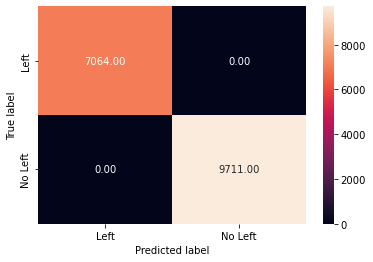

In [136]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [137]:
#from sklearn.metrics import roc_auc_score

In [138]:
#metrics.roc_auc_score( tree_test_pred.actual, tree_test_pred.predicted, multi_class= "ovr")

## Random Forest Model

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
pargrid_rf = {'n_estimators': [50,60,70,80,90,100],
                  'max_features': [2,3,4,5,6,7]}


In [141]:
from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [142]:
gscv_results.best_params_

{'max_features': 2, 'n_estimators': 100}

In [143]:
gscv_rf.best_score_

0.9995792712056584

In [144]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=70, max_features=2, n_jobs=-1)
radm_clf.fit( X_train, y_train )

RandomForestClassifier(max_features=2, n_estimators=70, n_jobs=-1,
                       oob_score=True)

In [145]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_clf.predict( X_test ) } )

In [146]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.8263762587055848


C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 15.0, 'Predicted label')

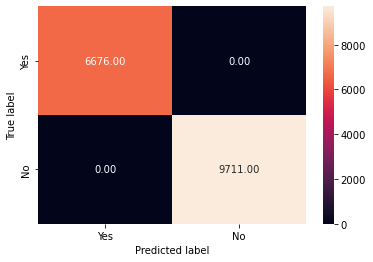

In [147]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature importance from the Random Forest Model

In [148]:
print(radm_clf.feature_importances_)
print(np.argsort(radm_clf.feature_importances_))

[0.14340858 0.20772932 0.02044316 0.08907086 0.04851918 0.04938239
 0.05323566 0.04112528 0.03889207 0.0568223  0.05281318 0.03195027
 0.11857703 0.0329965  0.01503422]
[14  2 11 13  8  7  4  5 10  6  9  3 12  0  1]


In [149]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

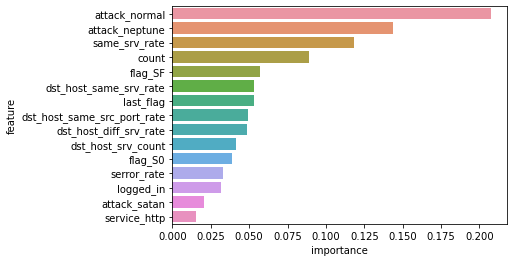

In [264]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )


plt.savefig('important_features.png')


<Figure size 432x288 with 0 Axes>

## Naive Bayes Model

In [151]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

#### 1) BernoulliNB

In [152]:
from sklearn.naive_bayes import BernoulliNB

In [153]:
bnb_clf = BernoulliNB()
bnb_clf.fit(X_train, y_train)

BernoulliNB()

In [154]:
y_pred=bnb_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 0., 0., 2.])

Text(0.5, 15.0, 'Predicted label')

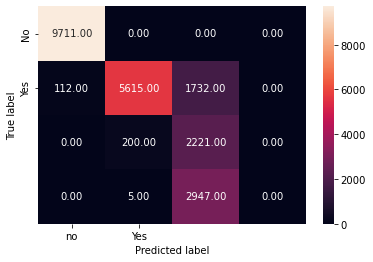

In [155]:
nb_cm = metrics.confusion_matrix( y_test,y_pred )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [156]:
accuracy_score( y_test, y_pred )

0.778379097724349

#### 2) GaussianNB

In [157]:
from sklearn.naive_bayes import GaussianNB

In [158]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [159]:
y_pred=gnb_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

Text(0.5, 15.0, 'Predicted label')

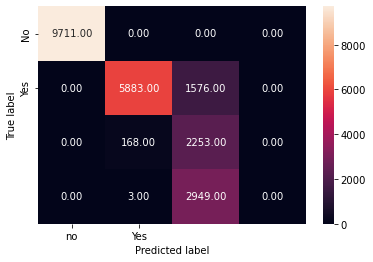

In [160]:
nb_cm = metrics.confusion_matrix( y_test, y_pred )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [161]:
accuracy_score( y_test, y_pred )

0.7916869981812537

# 3.MultinomialNB 

In [162]:
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)

MultinomialNB()

Text(0.5, 15.0, 'Predicted label')

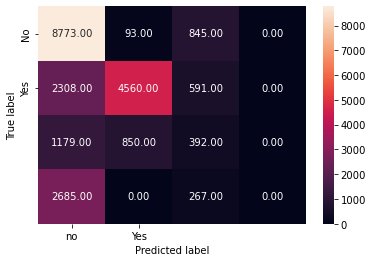

In [163]:
nb_cm = metrics.confusion_matrix( y_test,mnb_clf.predict( X_test) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [164]:
accuracy=metrics.accuracy_score( y_test, mnb_clf.predict( X_test ) )

In [165]:
accuracy

0.6088364459033846

### Support Vector Machine (SVM)

#### 1) LinearSVC

In [166]:
from sklearn.svm import LinearSVC

In [167]:
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(X_train, y_train)

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=0, tol=1e-05)

In [168]:
print(svm_clf.coef_)

[[-5.35716221e-03  2.00419127e+00 -8.99966954e-03 -1.54987442e-05
  -7.21154149e-04 -4.23305602e-04 -5.36863600e-04  2.27289305e-06
  -1.53282196e-03  8.93731622e-04 -5.47350172e-04 -6.37749861e-04
  -8.87877697e-03 -2.12318214e-03  2.68230844e-04]
 [ 3.38198573e+00 -5.47585259e+00 -3.66279028e+00  1.55420969e-02
  -7.58855493e-01 -2.12422998e+00  4.92645840e-01 -2.00967838e-03
   2.08618221e+00  1.67498771e+00  6.91805898e-02 -1.31614273e+00
   2.53288497e+00  6.40156990e-01  2.60503853e+00]
 [-3.22159061e+00 -5.39892521e+00  4.34715439e+00 -1.59049075e-02
   7.50554424e-01  2.13683442e+00 -5.22115136e-01  3.71570213e-03
  -2.09221724e+00 -1.65363401e+00 -6.63973417e-02  1.29933264e+00
  -2.41506138e+00 -6.12024179e-01 -2.60392262e+00]]


In [169]:
print(svm_clf.intercept_)

[-0.98393235 -4.56766748  4.42150115]


In [170]:
y_pred=svm_clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [171]:
accuracy_score( y_test, y_pred )

0.7959011666592734

#### 2) SVC

In [172]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

model = SVC(kernel='rbf', class_weight='balanced',gamma='scale')

In [174]:
model.fit(X_train, y_train)

SVC(class_weight='balanced')

In [175]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10],
              'gamma': [0.0001, 0.001]}
grid = GridSearchCV(model, param_grid)

grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 10], 'gamma': [0.0001, 0.001]})

In [176]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.001}


In [177]:
model = grid.best_estimator_
yfit = model.predict(X_test)

In [178]:
#y_pred=model.predict(X_test)
#y_pred

In [179]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      9711
         1.0       0.90      0.85      0.88      7459
         2.0       0.42      0.99      0.59      2421
         3.0       0.00      0.00      0.00      2952

    accuracy                           0.80     22543
   macro avg       0.57      0.70      0.61     22543
weighted avg       0.75      0.80      0.77     22543



C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'predicted label')

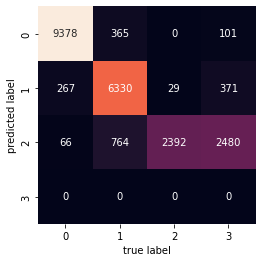

In [180]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [181]:
accuracy_score( y_test, y_pred )

0.7959011666592734

### Stochastic Gradient Descent (SGD)

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [183]:
model = SGDClassifier(loss="hinge", penalty="l2")
model.fit(X_train, y_train)

SGDClassifier()

In [184]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [185]:
accuracy_score( y_test, y_pred )

0.7695515237546023

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before 

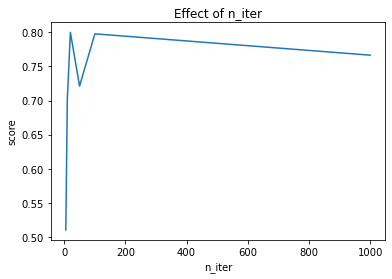

In [186]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    model = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

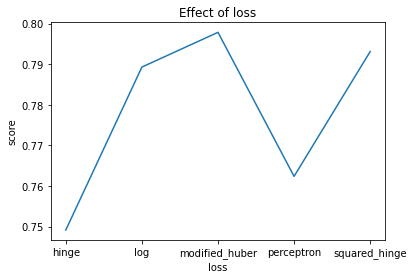

In [187]:
# losses
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    model = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.xlabel("loss")
plt.ylabel("score")
plt.title("Effect of loss")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores)

In [188]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=100)
clf = GridSearchCV(model, param_grid=params)

In [189]:
clf.fit(X_train, y_train)
print(clf.best_score_)

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before 

0.9884022285930006


C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [190]:
y_pred=clf.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 1.])

In [191]:
accuracy_score( y_test, y_pred )

0.8182140797586834

### Neural Network Model

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [193]:
# Now apply the transformations to the data:
train_X = scaler.transform(X_train)
test_X = scaler.transform(X_test)

In [194]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(train_X,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [195]:
y_pred=mlp.predict(test_X)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [196]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[9676    0   35    0]
 [   0 6818  641    0]
 [  23  224 2174    0]
 [   0  675 2277    0]]


In [197]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9711
         1.0       0.88      0.91      0.90      7459
         2.0       0.42      0.90      0.58      2421
         3.0       0.00      0.00      0.00      2952

    accuracy                           0.83     22543
   macro avg       0.58      0.70      0.62     22543
weighted avg       0.77      0.83      0.79     22543



C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
mlp.coefs_

[array([[-2.89212057e-01, -6.34176896e-02, -3.29539757e-01,
          6.90597549e-02,  2.35757245e-01,  5.20089829e-02,
         -2.43346768e-01,  3.36152591e-01, -3.63363330e-02,
         -1.71732409e-01,  1.67668667e-02, -2.62461540e-01,
          2.82329964e-01, -2.78751797e-01,  1.89610789e-01,
         -1.79163837e-02,  3.92645379e-01, -3.42852335e-01,
         -3.14284685e-01, -1.79675123e-01, -4.71029518e-01,
         -2.65151425e-01, -4.98586597e-01, -1.41214690e-01,
         -2.90770182e-01, -4.63182419e-01,  4.51826877e-01,
          5.87394516e-01, -3.17482306e-01, -1.56470229e-01],
        [-8.42217311e-02,  4.84522894e-01,  5.49263318e-01,
         -5.40590986e-01,  4.18354568e-01, -3.14163169e-01,
          1.63304470e-01,  2.32972340e-01, -3.93854073e-01,
          3.51246804e-01, -2.86811852e-01,  7.59654783e-01,
          2.41696959e-01,  4.25598614e-01,  2.56700248e-01,
         -3.06240266e-01,  1.11883541e-01,  3.95894022e-01,
          2.20830101e-01,  3.01005596e-

In [199]:
accuracy_score( y_test, y_pred )

0.8281062857649825

## Combine Model Predictions Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:

Bagging-> Building multiple models (typically of the same type) from different subsamples of the training dataset.

Boosting-> Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

Voting-> Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

### Bagging Algorithms

Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

1) Bagged Decision Trees

2) Random Forest

3) Extra Trees

#### 1. Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

In [200]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [208]:
#seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=None)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.999452259987816


In [209]:
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [210]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [211]:
accuracy_score( y_test, y_pred )

0.8116488488666105

#### 2. Random Forest
Random forest is an extension of bagged decision trees.

In [212]:
from sklearn.ensemble import RandomForestClassifier

In [214]:
#seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9995554566416962


In [215]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [216]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [217]:
accuracy_score( y_test, y_pred )

0.8172381670585104

#### 3. Extra Trees
Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

In [218]:
from sklearn.ensemble import ExtraTreesClassifier

In [219]:
#seed = 7
num_trees = 100
max_features = 7
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9995078268836401


In [220]:
model.fit(X_train, y_train)

ExtraTreesClassifier(max_features=7)

In [221]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [222]:
accuracy_score( y_test, y_pred )

0.815064543317216

### Boosting Algorithms

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1) AdaBoost

2) Stochastic Gradient Boosting

#### 1. AdaBoost

AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

In [223]:
from sklearn.ensemble import AdaBoostClassifier

In [224]:
#seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.9982297655949475


In [225]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=30)

In [226]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 1.])

In [227]:
accuracy_score( y_test, y_pred )

0.8369782194029188

#### 2. Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

In [228]:
from sklearn.ensemble import GradientBoostingClassifier

In [229]:
#seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=None)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=None)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.999039464550453


In [230]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [231]:
y_pred=model.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 1.])

In [232]:
accuracy_score( y_test, y_pred )

0.8126691212349731

### Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

In [233]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
#voting_clf = VotingClassifier(estimators = [('logreg',logreg),('radm_clf',radm_clf), ('clf_tree',clf_tree), 
   #                                         ('mlp',MLPClassifier()),('svm_clf',SVC())], voting = 'hard')
#voting_clf.fit(train_X, train_y)

In [234]:
#seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=None)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.996530966690071


In [235]:
ensemble.fit(X_train, y_train)

C:\Users\Vicky\anaconda31\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [236]:
y_pred=ensemble.predict(X_test)
y_pred

array([1., 0., 2., ..., 1., 0., 2.])

In [238]:
print(metrics.accuracy_score(y_test,ensemble.predict(X_test)))

0.8085436720933328


In [239]:
accuracy_score( y_test, y_pred )

0.8085436720933328

# Save Model

In [240]:
import pickle
# Saving model to disk of random forest
pickle.dump(lr_clf, open('model.pkl','wb'))

# Load Model and Predict

In [244]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[1,0,0,566,0.06,0.00,0.04,10,0,0,25,0,0.04,0.00,1]])

array([1.])